# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Write to csv files
import os
import csv

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs_zip = []
cities = []
country_codes = []
lat = []
lng = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size= 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size= 1500)
lat_lngs_zip = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
counter = 0
for lat_lng in lat_lngs_zip:
    city_info = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = city_info.city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        country_codes.append(city_info.country_code.upper())
        lat.append(round(lat_lng[0],2))
        lng.append(round(lat_lng[1],2))


In [4]:
# Print the city count to confirm sufficient count
len(cities), len(country_codes), len(lat), len(lng)

(608, 608, 608, 608)

In [5]:
# create a df for the cities
cities_df = pd.DataFrame({"Country": country_codes,
                          "City": cities,
                          "Lat": lat,
                          "Lng": lng})
cities_df = cities_df.sort_values(by=["Country", "City"])
cities_df = cities_df.reset_index(drop=True)
cities_df["ID"] = np.arange(len(cities))
cities_df = cities_df[["ID", "Country", "City", "Lat", "Lng"]]
cities_df.head()

,ID,Country,City,Lat,Lng
0,0,AE,sharjah,25.33,57.22
1,1,AF,farah,32.33,62.29
2,2,AF,geresk,32.17,63.83
3,3,AF,nahrin,35.96,69.13
4,4,AF,tir pol,33.52,60.71


In [6]:
# create output directory
if not os.path.isdir('../output'):
	os.makedirs('../output')
    
# Output cities data (CSV)
cities_file = "../output/cities.csv"
cities_df.to_csv(cities_file, index=False, header=True)
cities_df.head()

,ID,Country,City,Lat,Lng
0,0,AE,sharjah,25.33,57.22
1,1,AF,farah,32.33,62.29
2,2,AF,geresk,32.17,63.83
3,3,AF,nahrin,35.96,69.13
4,4,AF,tir pol,33.52,60.71


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
humidity = []
cloudiness = []
max_temperature = []
wind_speed = []
cities_with_weather_data = []
date = []
cities_log = []

In [8]:
# base query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
base_query_url = f"{url}appid={api_key}&units={units}&q="

In [9]:
# Get weather data from OpenWeather API
print('\n------------------------')
print('Begining Data Retrieval')
print('------------------------\n')

for index, row in cities_df.iterrows():
    city = row['City']
    try: 
        query_url = base_query_url + city
        response = requests.get(query_url).json()
        
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]['all'])
        max_temperature.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_with_weather_data.append(city)
        date.append(int(time.time())) 
        msg = f"Processing city with ID {index} | {city}"
        
    except Exception as e:
        
        if type(e) == KeyError:
            msg = f"...weather info not found for {city}. Skipping..."
        else:
            msg = f"...Other issue for city {city}. Skipping..."
               
    cities_log.append(msg)
    print(msg)
            
now = time.gmtime(time.time())
end_time = time.strftime("%m/%d/%y %H:%M", now)
end_date = time.strftime("%m/%d/%y", now)
print(f"\nFinished at {end_time} UTC. {len(date)} row of records created")


------------------------
Begining Data Retrieval
------------------------

Processing city with ID 0 | sharjah
Processing city with ID 1 | farah
...weather info not found for geresk. Skipping...
Processing city with ID 3 | nahrin
...weather info not found for tir pol. Skipping...
Processing city with ID 5 | codrington
Processing city with ID 6 | luanda
Processing city with ID 7 | lucapa
Processing city with ID 8 | luena
Processing city with ID 9 | lumeje
Processing city with ID 10 | namibe
Processing city with ID 11 | soyo
Processing city with ID 12 | comodoro rivadavia
Processing city with ID 13 | mar del plata
Processing city with ID 14 | necochea
Processing city with ID 15 | san carlos de bariloche
Processing city with ID 16 | san luis
Processing city with ID 17 | tucuman
Processing city with ID 18 | ushuaia
Processing city with ID 19 | venado tuerto
Processing city with ID 20 | albany
Processing city with ID 21 | batemans bay
Processing city with ID 22 | broken hill
Processing cit

Processing city with ID 203 | bolgatanga
Processing city with ID 204 | wenchi
...weather info not found for illoqqortoormiut. Skipping...
Processing city with ID 206 | ilulissat
Processing city with ID 207 | maniitsoq
Processing city with ID 208 | nanortalik
Processing city with ID 209 | narsaq
Processing city with ID 210 | nuuk
Processing city with ID 211 | qaanaaq
Processing city with ID 212 | sisimiut
Processing city with ID 213 | tasiilaq
Processing city with ID 214 | upernavik
Processing city with ID 215 | coyah
Processing city with ID 216 | dabola
...weather info not found for riaba. Skipping...
Processing city with ID 218 | san jose
Processing city with ID 219 | barra patuca
Processing city with ID 220 | vinkovci
Processing city with ID 221 | toalmas
Processing city with ID 222 | atambua
Processing city with ID 223 | banda aceh
...weather info not found for bengkulu. Skipping...
Processing city with ID 225 | biak
Processing city with ID 226 | bireun
Processing city with ID 227 |

Processing city with ID 407 | carmen del parana
Processing city with ID 408 | khor
Processing city with ID 409 | saint-louis
Processing city with ID 410 | saint-philippe
Processing city with ID 411 | abrau-dyurso
Processing city with ID 412 | aksarka
Processing city with ID 413 | aleksandrov gay
...weather info not found for amderma. Skipping...
Processing city with ID 415 | anadyr
Processing city with ID 416 | andreyevo
Processing city with ID 417 | arkhangelsk
Processing city with ID 418 | arman
Processing city with ID 419 | balagansk
Processing city with ID 420 | bayevo
...weather info not found for belushya guba. Skipping...
Processing city with ID 422 | beringovskiy
Processing city with ID 423 | bilibino
Processing city with ID 424 | bobrovka
...weather info not found for chelyabinsk-70. Skipping...
Processing city with ID 426 | chernyshevskiy
Processing city with ID 427 | cherskiy
Processing city with ID 428 | chokurdakh
Processing city with ID 429 | deputatskiy
Processing city w

Processing city with ID 605 | saldanha
...weather info not found for umzimvubu. Skipping...
Processing city with ID 607 | vryburg

Finished at 09/20/18 08:10 UTC. 537 row of records created


In [10]:
len(humidity), len(cloudiness), len(max_temperature), len(wind_speed), len(cities_log)

(537, 537, 537, 537, 608)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create a data frame with the weather info
weather_df = pd.DataFrame({
    "City": cities_with_weather_data,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Max Temp": max_temperature,
    "Wind Speed": wind_speed,
    "Date": date
})
weather_df.head()

,City,Humidity,Cloudiness,Max Temp,Wind Speed,Date
0,sharjah,16,0,107.60,8.05,1537430839
1,farah,19,0,93.68,12.66,1537430839
2,nahrin,27,0,77.57,3.71,1537430840
3,codrington,68,36,60.38,6.29,1537430840
4,luanda,73,75,75.20,3.36,1537430840


In [12]:
# merge weather data frame with city data frame
weather_with_country_df = pd.merge(weather_df, cities_df, on="City")
weather_with_country_df.head()

,City,Humidity,Cloudiness,Max Temp,Wind Speed,Date,ID,Country,Lat,Lng
0,sharjah,16,0,107.60,8.05,1537430839,0,AE,25.33,57.22
1,farah,19,0,93.68,12.66,1537430839,1,AF,32.33,62.29
2,nahrin,27,0,77.57,3.71,1537430840,3,AF,35.96,69.13
3,codrington,68,36,60.38,6.29,1537430840,5,AG,26.97,-48.98
4,luanda,73,75,75.20,3.36,1537430840,6,AO,-9.74,10.90


In [13]:
# Re-prder the columns
weather_with_country_df = weather_with_country_df[["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]]
weather_with_country_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sharjah,0,AE,1537430839,16,25.33,57.22,107.60,8.05
1,farah,0,AF,1537430839,19,32.33,62.29,93.68,12.66
2,nahrin,0,AF,1537430840,27,35.96,69.13,77.57,3.71
3,codrington,36,AG,1537430840,68,26.97,-48.98,60.38,6.29
4,luanda,75,AO,1537430840,73,-9.74,10.90,75.20,3.36


In [14]:
# Output city weather data (CSV)
city_weather_file = "../output/city_weather.csv"
weather_with_country_df.to_csv(city_weather_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [15]:
# Organize data for using for loop to plot
terms = [["Max Temperature", "F"], ["Humidity", " (%)"],[ "Cloudiness", " (%)"], ["Wind Speed", " (mph)"]]
color = '#1177AA'

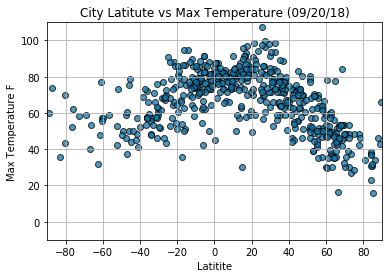

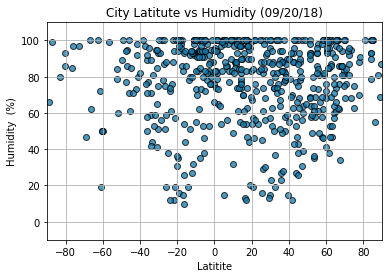

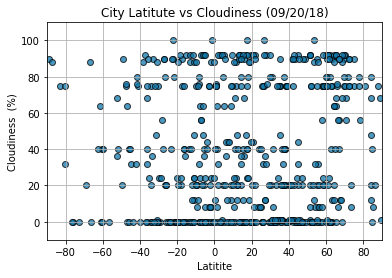

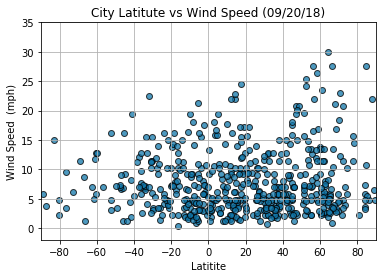

In [17]:
# Use subplot to plot the charts
for term in terms: 
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
        
    # Set x limit, y limit
    ax.set_xlim(-90, 90)
    if term[0] == "Wind Speed":
        ax.set_ylim(-2, 35)
    else:
        ax.set_ylim(-10, 110)
    
    # Set title, xlabel, ylabel, and grid
    ax.set_title(f"City Latitute vs {term[0]} ({end_date})")
    ax.set_xlabel(f"Latitite")
    ax.set_ylabel(f"{term[0]} {term[1]}")
    plt.grid(True)
       
    # plot
    if term[0] == "Max Temperature":
        filename = "max_temp"
        ax.scatter(weather_with_country_df["Lat"], weather_with_country_df["Max Temp"], marker="o", facecolors=color, edgecolors="black", alpha=0.75)
    else:
        filename = term[0].lower()
        ax.scatter(weather_with_country_df["Lat"], weather_with_country_df[term[0]], marker="o", facecolors=color, edgecolors="black", alpha=0.75)
    
    # Save plot to file
    filename = filename + ".png"
    file_path = f"../output/{filename}"
    plt.savefig(file_path)
    plt.show()

In [108]:
    filename = "abc"
    filename = filename + ".png"
    file_path = f"../output/{filename}"
    file_path
#     plt.savefig(filename)

'../output/abc.png'

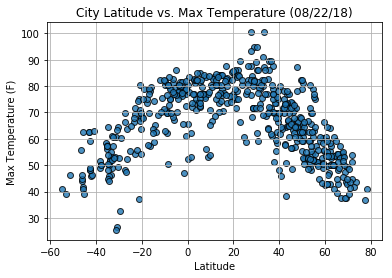

#### Latitude vs. Humidity Plot

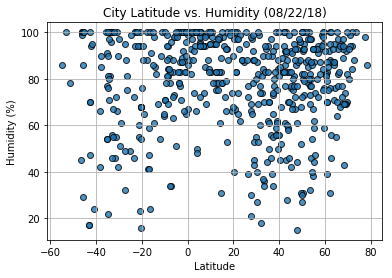

#### Latitude vs. Cloudiness Plot

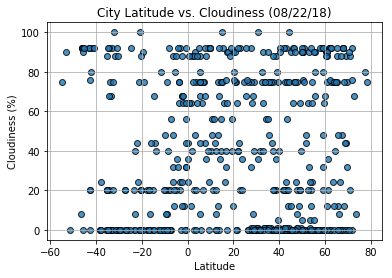

#### Latitude vs. Wind Speed Plot

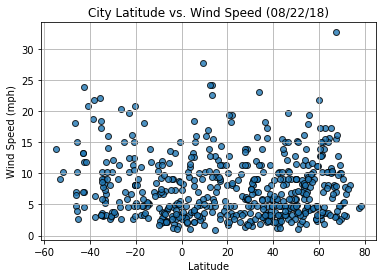